# Bayesian Optimization

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df_clean.drop(['encode_diag'],axis='columns') ,df_clean['encode_diag'],test_size=0.27,random_state=0)

In [ ]:
from hpsklearn import HyperoptEstimator,any_classifier,any_preprocessing
from hyperopt import tpe
hpts=HyperoptEstimator(classifier=any_classifier('clf'),preprocessing=any_preprocessing('pre'),algo=tpe.suggest,max_evals=10)

In [ ]:
hpts.fit(X_train,Y_train)

100%|██████████| 1/1 [00:04<00:00,  4.14s/it, best loss: 0.0]


In [ ]:
hpts.best_model()

{'ex_preprocs': (),
 'learner': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.05198358745604793, loss='deviance',
                            max_depth=None, max_features=0.7289762193644673,
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=2,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=360, n_iter_no_change=None,
                            presort='deprecated', random_state=1, subsample=1.0,
                            tol=0.0001, validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'preprocs': (PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),)}

In [ ]:
gbc=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.014642752253745811, loss='deviance',
                            max_depth=None, max_features='sqrt',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=102, n_iter_no_change=None,
                            presort='deprecated', random_state=3,
                            subsample=0.6217813737448401, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.014642752253745811, loss='deviance',
                           max_depth=None, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=102, n_iter_no_change=None,
                           presort='deprecated', random_state=3,
                           subsample=0.6217813737448401, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred6=gbc.predict(X_test)

In [ ]:
gbc.score(X_test,Y_test)

1.0

In [ ]:
print(classification_report(Y_test,y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        55

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [ ]:
print(confusion_matrix(Y_test,y_pred6))

[[99  0]
 [ 0 55]]


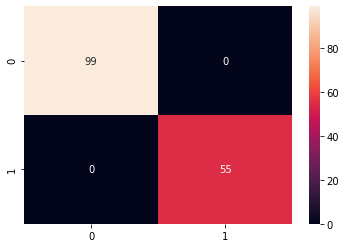

In [ ]:
sn.heatmap(confusion_matrix(Y_test,y_pred6),annot=True)